In [13]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [14]:
# Завантаження даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перетворення даних
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [15]:
# Створення моделі
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Навчання моделі
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Epoch 1/5
938/938 [==============================] - 34s 35ms/step - loss: 0.5362 - accuracy: 0.8008 - val_loss: 0.3941 - val_accuracy: 0.8531
Epoch 2/5
938/938 [==============================] - 33s 35ms/step - loss: 0.3405 - accuracy: 0.8764 - val_loss: 0.3278 - val_accuracy: 0.8810
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.2908 - accuracy: 0.8942 - val_loss: 0.3140 - val_accuracy: 0.8903
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.2603 - accuracy: 0.9046 - val_loss: 0.2793 - val_accuracy: 0.8971
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.2741 - accuracy: 0.9001
Test accuracy: 0.9000999927520752
Test loss: 0.2741206884384155


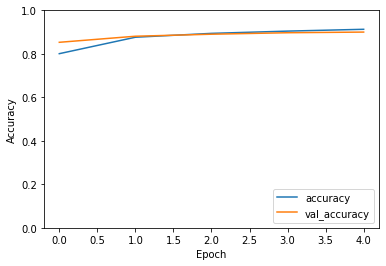

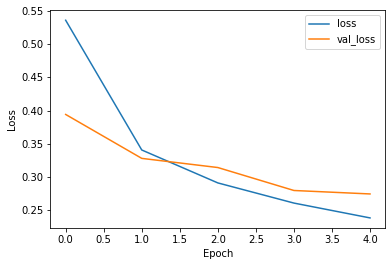

In [18]:
# Візуалізація точності на тренувальному та валідаційному наборах даних
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Візуалізація втрат на тренувальному та валідаційному наборах даних
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()